<a href="https://www.kaggle.com/anastasiiaapanasiuk/shull-bidding?scriptVersionId=85863062" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <h1><center> Data Preparation and Machine Learning </center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score     
from sklearn.metrics import confusion_matrix             
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression                     
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to find the real price of items in the market based on the demand. The price offered by anyone participating in this process is termed as a 'bid'. Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. The goal is to use classification or clustering algorithms to predict the bids in the future.

**Data Dictionary**
* **Record ID**: Unique identifier of a record in the dataset.
* **Auction ID**: Unique identifier of an auction.
* **Bidder ID**: Unique identifier of a bidder.
* **Bidder Tendency**: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.
* **Bidding Ratio**: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.
* **Successive Outbidding**: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.
* **Last Bidding**: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.
* **Auction Bids**: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.
* **Auction Starting Price**: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.
* **Early Bidding**: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.
* **Winning Ratio**: A shill bidder competes in many auctions but hardly wins any auctions.
* **Auction Duration**: How long an auction lasted.
* **Class**: 0 for normal behaviour bidding; 1 for otherwise.

## Content:
### 1. Bussiness Understanding;
### 2. Data Understanding;
### 3. Data preparation;
### 4. Modeling;
### 5. Evaluation;
### 6. Deployment;
### References.

For purpose of this project we are going to use established model for data mining - **CRISP-DM** (the cross-industry standard process for data mining). CRISP-DM project consists of 6 stages. Following one another, it helps in keeping sequence of project's steps. The defined stages of CRISP-DM are:
* Business Understanding;
* Data understanding;
* Data Preparation;
* Modeling;
* Evaluation;
* Deployment.

### 1. Business understanding

The purpose of the Business Understanding phase is to understand what the business wants to solve. On this stage we set questions we need to answer with the project's outcome. Following the assigment task we can define the next questions within the project:
* What features are the most important for bidding class prediction?
* Can a target variable be predicted with an accuracy higher than 90%?

### 2. Data Understanding

The data understanding phase goes hand in hand with the business understanding phase and encourages the focus to ascertain, assemble, and scrutinize the data sets that can help us to achieve the project goals. (Trisit Kumar Chatterjee, 2020)

My first step will be uploading the dataset. Also, I want to set **Record_ID** as an index column. The reason for that is that the **Record_ID** column contains a unique identification number which can facilitate data retrieval and handling data in general.

In [2]:
df = pd.read_csv('../input/shill-bidding-dataset/Shill Bidding Dataset.csv', index_col='Record_ID')

In [3]:
df

,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,,,
1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0


Next, I want to see if we have any missing values and what type of the observations we have. I will use ***.info*** function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6321 entries, 1 to 15144
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auction_ID              6321 non-null   int64  
 1   Bidder_ID               6321 non-null   object 
 2   Bidder_Tendency         6321 non-null   float64
 3   Bidding_Ratio           6321 non-null   float64
 4   Successive_Outbidding   6321 non-null   float64
 5   Last_Bidding            6321 non-null   float64
 6   Auction_Bids            6321 non-null   float64
 7   Starting_Price_Average  6321 non-null   float64
 8   Early_Bidding           6321 non-null   float64
 9   Winning_Ratio           6321 non-null   float64
 10  Auction_Duration        6321 non-null   int64  
 11  Class                   6321 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 642.0+ KB


We can see that overall the dataset consists of numerical data with one column represented by 'object' data type. Data size is 6321 rows and 12 columns. We also don't observe any missing values, which means we won't have to handle them in the next chapter. 

Next, I want to extract some statistical information and then get a visual understanding of the data and plot some graphs.

In [5]:
df.describe()

,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


From the table above we can observe, that values range from 0 to 1 for each feature except **Auction_Duration** and **Auction_ID**. **Last_Bidding** and **Auction_Duration** seem to follow a normal distribution. Also, I can infer that **Winning_Ratio** and **Successive_Outbidding** have lots of observations cluster around either **0** or **1** values. And the dependent variable **Class** is more represented by **0** class than **1** as mean equals 0.1. It means that the data is imbalanced and we will have to decide how to deal with it in the next chapter. 
Let's see how many observations we have represented for each class.

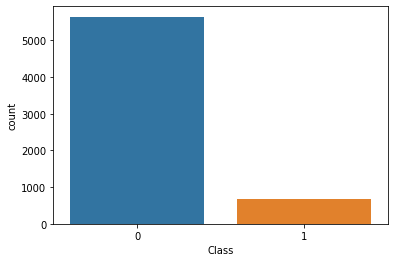

None
0    5646
1     675
Name: Class, dtype: int64


In [6]:
sns.countplot(df['Class'])
print(plt.show())
print(df.Class.value_counts())

With the graph as well as with the ***value_counts*** we can confirm that **0** class has 5646 entries while **1** class has only 675 entries. I will see models' accuracy in the Modeling chapter and if imbalanced classes strongly affect accuracy we will have to balance them.

As the only one object feature we have is a bidder name I want to see if I have any unique values and then decide if we need to keep the feature.

In [7]:
df.Bidder_ID.value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: Bidder_ID, Length: 1054, dtype: int64

We can observe that we have 1054 unique values. We can't really extract any usefull information from it as it's represented by encrypted unique names, therefore I'll simply drop it.

In [8]:
df = df.drop(columns='Bidder_ID')

As we are dealing with a classification problem we don't need to identify correlation between variables.

I also want to take a look at boxplots for each variable to get a better understanding of distribution and outliers.

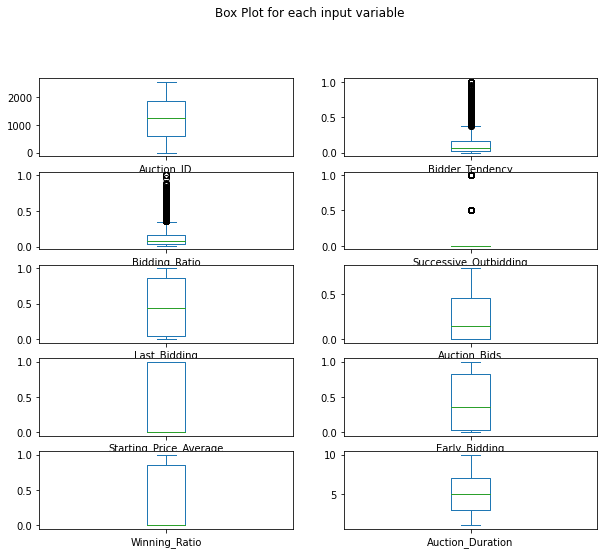

In [9]:
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.show()

**Bidder_Tendency** and **Bidding_Ratio** have many outliers. We will discuss in the next chapter if we need to remove them. **Auction_ID**, **Last_Bidding**, **Early_Bidding** and **Auction_Duration** seem to follow normal distribution. We infered earlier that **Winning_Ratio** and **Starting_Price_Average** have values mostly clustered around **0** and **1**. **Successive_Outbidding** boxplot looks interesting, as it shows that we migh have outliers. I am going to plot density graphs for these 3 features to get a better visual comprehension.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Probability Density')

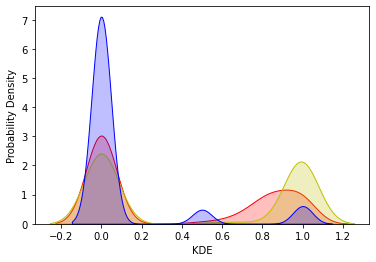

In [10]:
print(sns.kdeplot(data=df, x='Winning_Ratio', color='r', shade=True))
print(sns.kdeplot(data=df, x='Starting_Price_Average', color='y', shade=True))
print(sns.kdeplot(data=df, x='Successive_Outbidding', color='b', shade=True))

plt.xlabel('KDE')
plt.ylabel('Probability Density')

With the graph we can confirm the statement we made above. As for **Successive_Outbidding** variable, it's not ouliers but data is represented by only 3 values **0**, **0.5** and **1**. As number of **0** values are drastically higher than **0.5** and **1** it shows the values as outliers.

0.0    5478
1.0     469
0.5     374
Name: Successive_Outbidding, dtype: int64
count    6321.000000
mean        0.103781
std         0.279698
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Successive_Outbidding, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


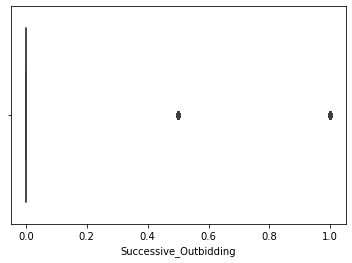

In [11]:
print(df.Successive_Outbidding.value_counts())
print(df.Successive_Outbidding.describe())
print(sns.boxplot(data=df, x='Successive_Outbidding'))

We've prepared everything we needed and now can move to another stage **Data preparation**.

### 3. Data Preparation

This stage, which is often referred to as “data wrangling” or “data munging”, has the objective is to develop the final data set for modelling. Covers all activities to construct the final dataset from the initial raw data. Data preparation tasks are likely to be performed multiple times and not in any prescribed order. Tasks include table, record and attribute selection as well as transformation and cleaning of data for modelling tools.

I'll start the Data Preparation section with normalization. Normalization typically means rescaling the values into a range of [0,1]. (Geller, 2019)
When we have all features normalized within one range it will help ML models run faster and with the better accuracy.
The reason why I'll be using normalization is that most of the features are already ranged between 0 and 1 except **Auction_ID** and **Auction_Duration**, therefore I will scale only these two features.

In [12]:
df1 = df[['Auction_ID','Auction_Duration']]
df2 = df.drop(columns = ['Auction_ID','Auction_Duration'])
minmax = MinMaxScaler().fit(df1)
minmax = minmax.transform(df1)

After I've applied the scaler I want to record the scaled array in DataFrame and then combine in one DataFrame.

In [13]:
df2 = df2.reset_index()

In [14]:
df1 = pd.DataFrame(minmax, columns = ['Auction_ID','Auction_Duration'])
df1

,Auction_ID,Auction_Duration
0,0.287011,0.444444
1,0.287011,0.444444
2,0.287011,0.444444
3,0.287011,0.444444
4,0.353336,0.666667
...,...,...
6316,0.298066,0.222222
6317,0.977497,0.666667
6318,0.977497,0.666667
6319,0.977497,0.666667


In [15]:
df = df1.join(df2, how='outer')
index = df2['Record_ID']
df = df.set_index('Record_ID')
df

,Auction_ID,Auction_Duration,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
Record_ID,,,,,,,,,,,
1,0.287011,0.444444,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0
2,0.287011,0.444444,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0
3,0.287011,0.444444,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0
4,0.287011,0.444444,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0
5,0.353336,0.666667,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...
15129,0.298066,0.222222,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,1
15137,0.977497,0.666667,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,0
15138,0.977497,0.666667,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,0


Finally, we've got the DataFrame with all feature ranged with the same range [0,1]. 

#### Features importances

As a part of my business understanding part I've defined a question I would like to get an answer *'What features are the most important for bidding class prediction?'*
In order to get an answer on the question I'll be using the ***DecisionTreeClassifier*** which will range fetures by their importance.
Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature. (Ronaghan, 2018)

As a first step of defining features importances I'll separate independent variables from the dependent variable.

In [16]:
X = df.drop(columns = 'Class')
y = df['Class']

Next, I'll run the DecisionTreeClassifier.

In [17]:
cls = DecisionTreeClassifier()
cls.fit(X, y)

DecisionTreeClassifier()

In [18]:
importances = cls.feature_importances_
columns = X.columns
columns

Index(['Auction_ID', 'Auction_Duration', 'Bidder_Tendency', 'Bidding_Ratio',
       'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids',
       'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio'],
      dtype='object')

I want to plot a graph to display features importances in descending order.

Text(0, 0.5, 'Percentage of importances')

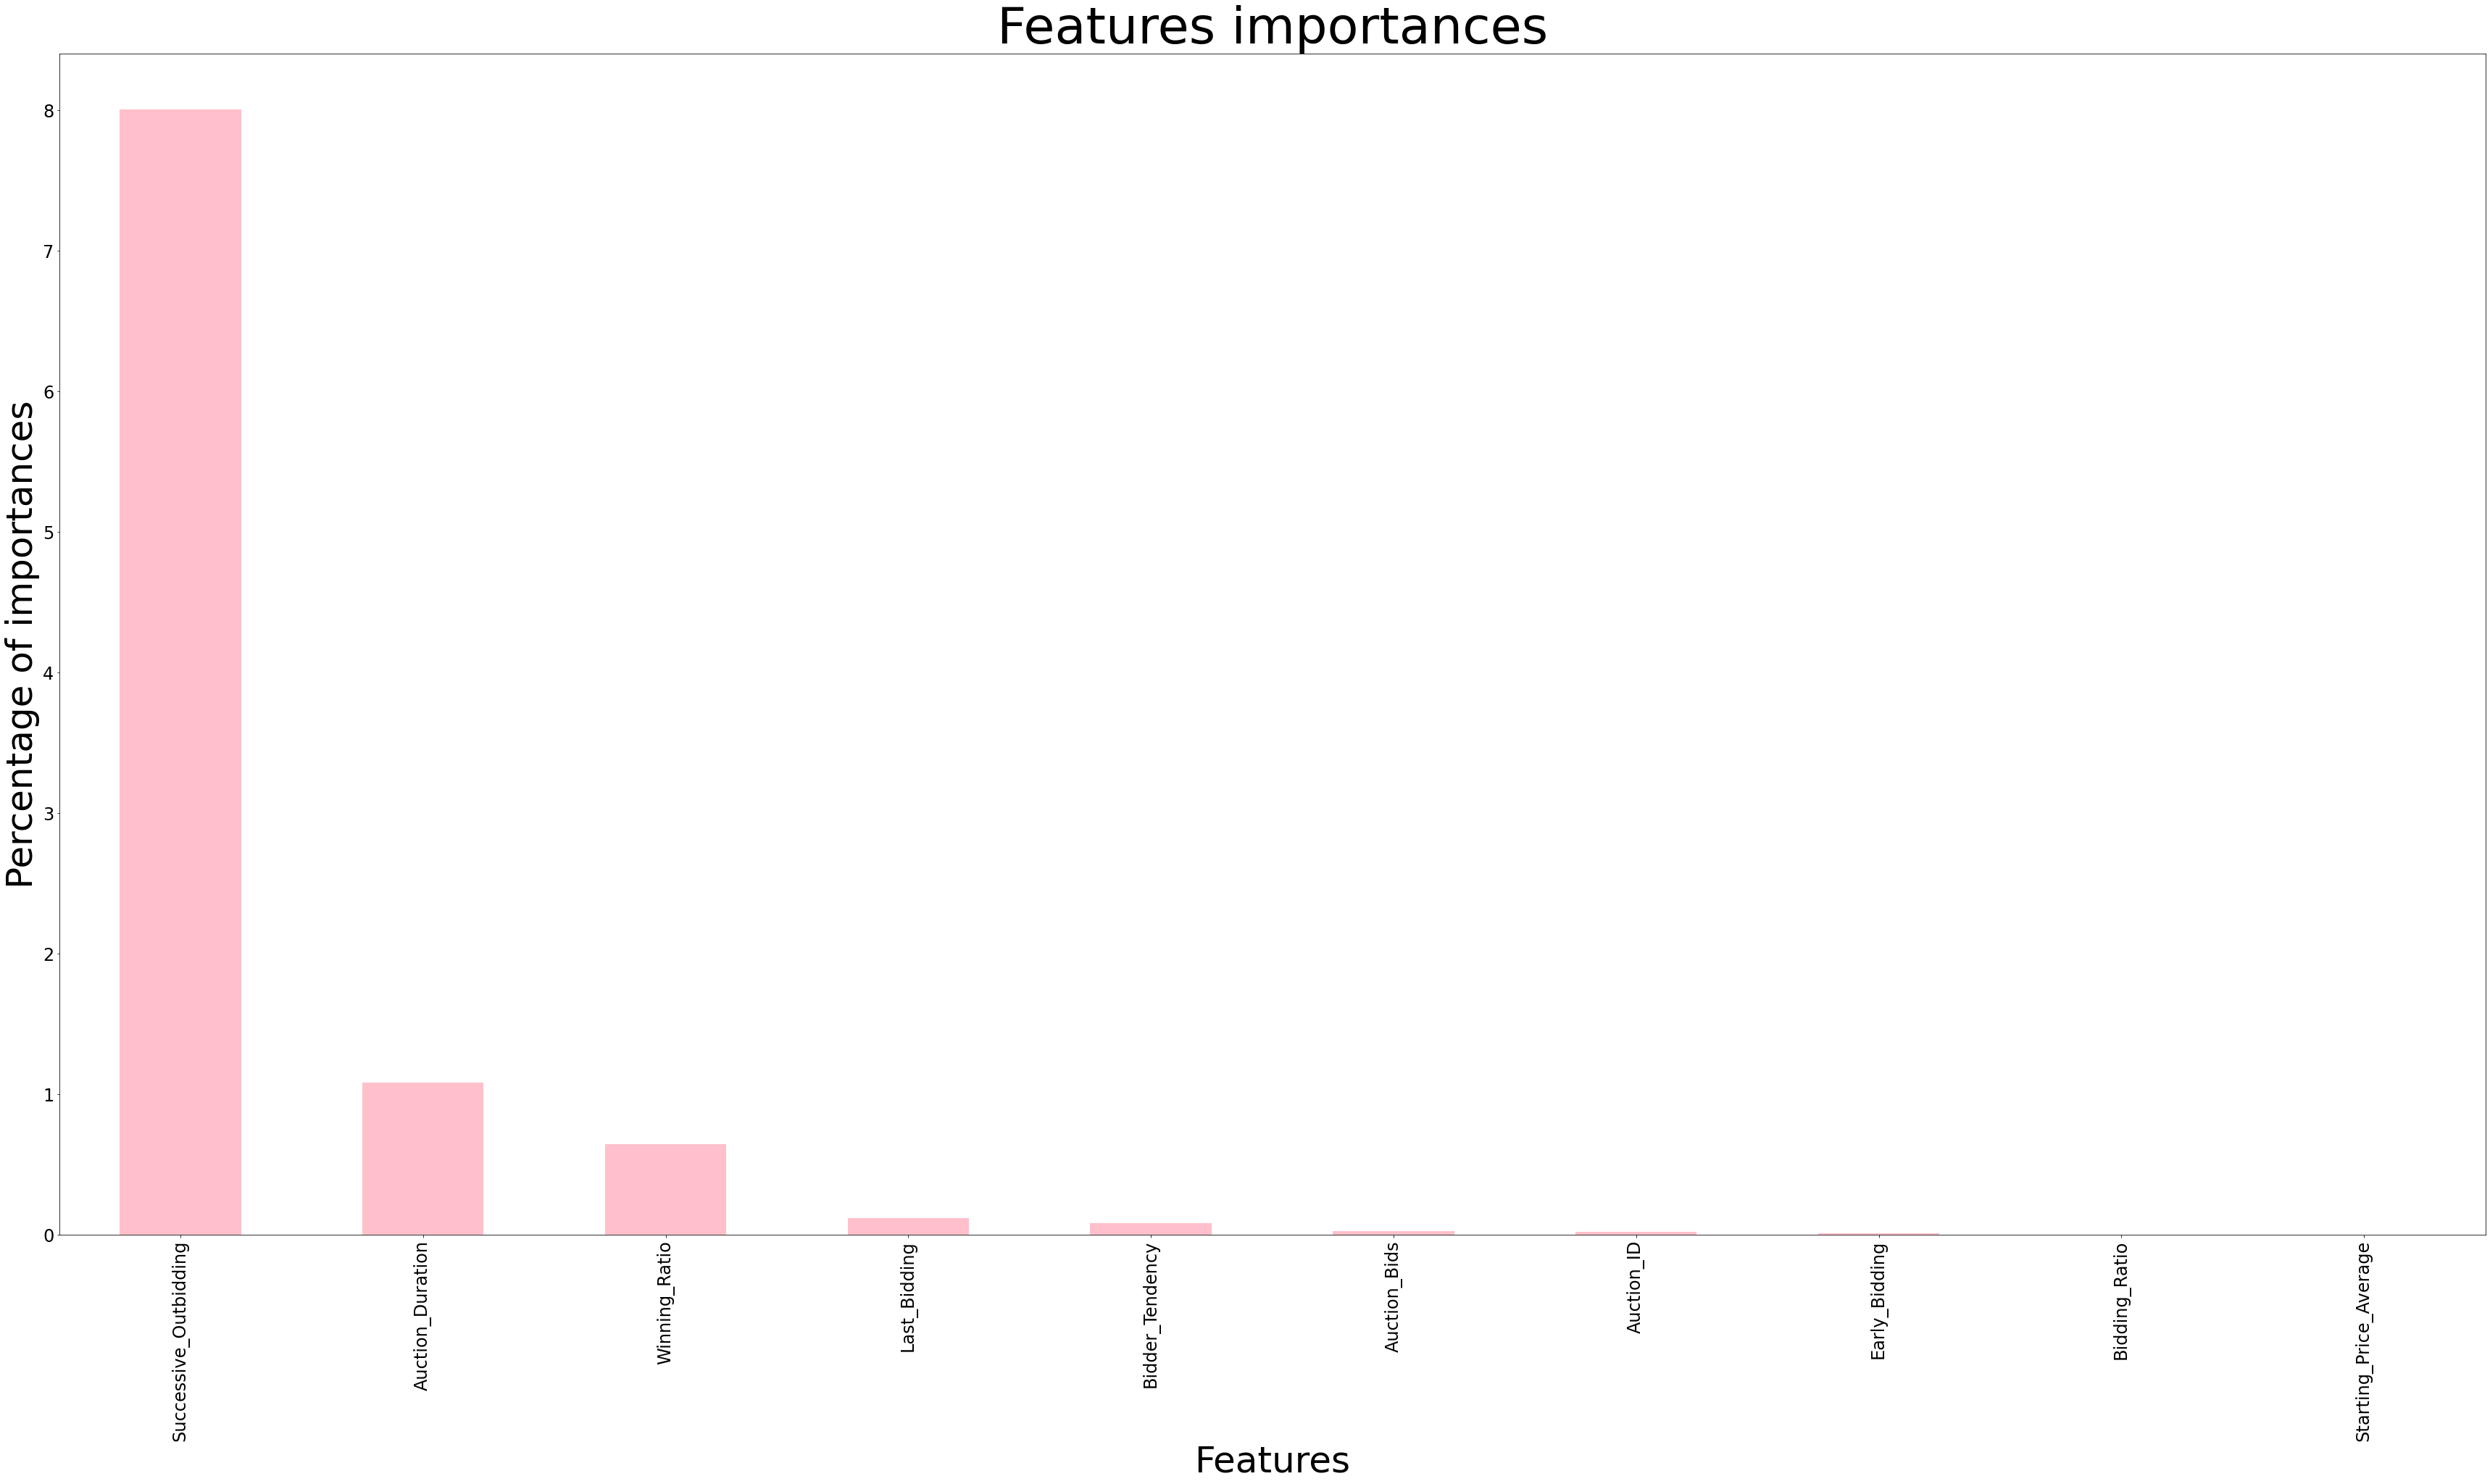

In [19]:
df_import = pd.DataFrame(importances, columns = ['Feature importances'], index=columns)
df_import['Percentage'] = pd.DataFrame((df_import.sort_values(by= ['Feature importances'], ascending=False)/df_import.shape[0])*100)
pd.options.display.float_format = "{:.2f}".format 
df_import=df_import.sort_values(by= ['Percentage'], ascending=False)

# plotting features importances
g = df_import['Percentage'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'pink')
g.set_title('Features importances', fontsize=70)
g.set_xlabel('Features', fontsize=50)
g.set_ylabel('Percentage of importances', fontsize=50)

We see that three the most important features for predicting the target variable are:
* ***Successive_Outbidding***;
* ***Auction_Duration***;
* ***Winning_Ratio***,

and the less important are:
* ***Starting_Price_Average***;
* ***Auction_ID***;
* ***Early_Bidding***.

#### Dimensionality reduction

We use dimensionality reduction when  we want to decrease the number of features in a dataset. Two techniques for dimensionality reduction are:
* Principal Component Analysis (PCA);
* Linear Discriminant Analysis (LDA).

Both LDA and PCA are linear transformation techniques: LDA is a supervised whereas PCA is unsupervised – PCA ignores class labels. In contrast to PCA, LDA attempts to find a feature subspace that maximizes class separability. (Raschka, 2022)
In this chapter I want to apply both PCA and LDA and compare results.

##### PCA

PCA is a statistical variance based procedure that converts a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. In simpler words, PCA is often used to simplify data, reduce noise, and find unmeasured “latent variables”. (Volpi, 2020)
We've already separated independants variables and the target variable, therefore we can apply PCA straight away.

First, I want to plot an Explained varaince ratio graph to see how much of the variance in the original data is encapsulated in the new component variables.

Text(0, 0.5, 'Cumulative explained variance')

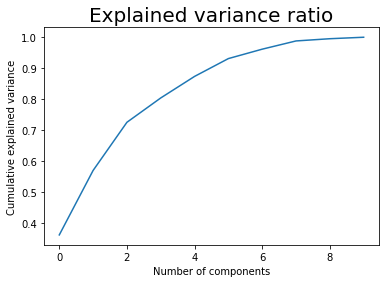

In [20]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio', fontsize = 20)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

From the graph above we see that in order to keep 90% of the original data we need to use 6 components.

In [21]:
pca = PCA(n_components=6)
projected = pca.fit_transform(X)

In [22]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36141299, 0.20827264, 0.15559512, 0.07863725, 0.06955875,
       0.05760696])

First 3 components contain the most ammount of data while the last three contain less than 20%. This the last step I want to create a DataFrame with 6 components and a target variable.

In [23]:
principal_df = pd.DataFrame(data = projected, columns = ['PC 1','PC 2','PC 3','PC 4','PC 5','PC 6'], index=index)
df_pca = principal_df.join(y, how='outer')
df_pca.head(5)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,Class
Record_ID,,,,,,,
1,-0.28,-0.28,0.74,-0.19,0.02,-0.28,0
2,-0.34,-0.13,0.82,-0.20,-0.00,-0.47,0
3,-0.37,-0.09,0.87,-0.20,-0.00,-0.46,0
4,-0.28,-0.01,0.80,-0.21,-0.00,-0.48,0
5,-0.82,-0.21,-0.04,-0.04,0.28,-0.09,0


##### LDA

Linear Discriminant Analysis, or LDA, uses the information from both features to create a new axis and projects the data on to the new axis in such a way as to minimizes the variance and maximizes the distance between the means of the two classes. (Maklin, 2019)

I start with ***fit_transform*** of the both dependent and independent variables and then will take a look at the explained_variance_ratio.

In [24]:
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X,y)

In [25]:
lda.explained_variance_ratio_

array([1.])

As our target variable is represented only by 2 classes, the LDA has reduced the number of components to 1. If we had at least two components we would be able to plot the data on the two-dimension graph. However in our case the data is represented by one dimension and the plot would look like a simple one dimension line.
I want to create a DataFrame and record there LDA 1 we got as well as the target variable.

In [26]:
linear_df = pd.DataFrame(data = x_lda, columns = ['LDA 1'], index=index)
df_lda = linear_df.join(y, how='outer')
df_lda.head(10)

,LDA 1,Class
Record_ID,,
1,-0.71,0
2,-0.64,0
3,-0.61,0
4,-0.61,0
5,-0.82,0
8,-0.72,0
10,-0.70,0
12,7.61,1
13,7.40,1


From the table above we see, that negative numbers in LDA 1 belong to '0 class' and positive numbers belong to '1 class'.

PCA dimensionality reduction method allows us to choose the number of components we need to use. Apart from PCA in LDA we can't control the number of components they will be always reduced by one from number of classes we have represented as a target variable. However, LDA is a better use for solving classification problems as it creates a clear separation between classes. 

It was the last step of this stage. The dataset is ready for applying ML models. For the purpose of the modeling stage I'm going to use dataset with applied LDA.

### 4. Modeling

At this stage we will select the actual modelling technique that is to be used. It can be one or several models. According to the CA task I'll choose two models to work with and will explain my choice.
As a first step of the stage I'll separate the target variable from dependent variables.

In [27]:
X = df_lda.drop(columns='Class')
y = df_lda['Class']

Next, I'll split the dataset on train and test parts, keeping train part equals to 65% and train part 35%.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4108, 1), (2213, 1), (4108,), (2213,))

The first algorithm I'll be working with is a Logistic Regression. Logistic Regression is a Supervised Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. (Li, 2017).
The reason why I'll be using the Logistic regression algorithm is because it's designed for two-class (binary) problems, modeling the target using a binomial probability distribution function.

#### Logistic Regression

First step is to fit the model:

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

With the next step I want to define the best model's parameters in order to get the best possible accuracy.
I'll be working with the next LogisticRegression parameters:
* **solvers**;
* **penalty**;
* **c_values**.

**Solvers** - Algorithm to use in the optimization problem:
* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
* ‘liblinear’ is limited to one-versus-rest schemes.

**Penalty** - Specify the norm of the penalty:
* 'none': no penalty is added;
* 'l2': add a L2 penalty term and it is the default choice;
* 'l1': add a L1 penalty term;

**C_values** - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

##### Tuning hyper-parameters of an estimator

We need to records parameters we've defined in a list:

In [30]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

To tune the parameters we will be using GridSearchCV. GridSearchCV is as exhaustive search over specified parameter values for an estimator. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. (Shah, 2021)

In [31]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and

In [32]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.979908 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


We've defined that the best accuracy will'be reached by using C=0.1, penalty = 'l2' and a  solver = 'liblinear'. Now, let's train the model with these parameters:

In [33]:
logreg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Let's see what accuracy we get on training and testins set to make sure the model is not underfitted or overfitted.

In [34]:
print('Training score: {:.3f}'.format(logreg.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(logreg.score(X_test,y_test)))

Training score: 0.979
Testing score: 0.975


Wee see that both training and testing scores are high and the model perfoms well on both sets. The last step is to run the classification report and identify ***Type I and Type II errors***.

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1989
           1       0.80      1.00      0.89       224

    accuracy                           0.97      2213
   macro avg       0.90      0.98      0.94      2213
weighted avg       0.98      0.97      0.98      2213

AxesSubplot(0.125,0.125;0.775x0.755)


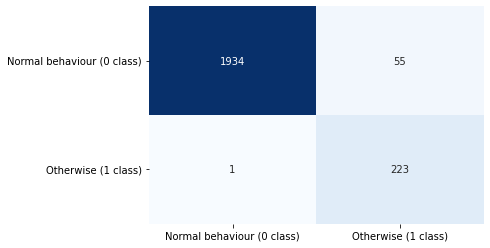

In [35]:
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

We can obserse that the model perfomed very well. Over 1984 **0 class** values 55 were predicted as False Positive and over 224 **1 class** values only 1 was predicted as False Negative, which is a very good result.

Next ML model I want to use is a DecisionTreeClassifier. Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions. The intuition behind Decision Trees is that we use the dataset features to create yes/no questions and continually split the dataset until we isolate all data points belonging to each class. Every time we ask a question we add a node to the tree. The result of asking a question splits the dataset based on the value of a feature, and creates new nodes. The algorithm tries to completely separate the dataset such that all leaf nodes, i.e., the nodes that don’t split the data further, belong to a single class. These are called pure leaf nodes. In the end, the algorithm can only assign one class to the data points in each leaf node. (Bento, 2021)

#### Decision Tree

Fitting the model first:

In [36]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

Similarly to the previous chapter we want to define the best parameters in order to reach the best accuracy. For this model I'll be chechking the next parameters:
* **Max_depth**;
* **Min_samples_leaf**.

**Max_depth** - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**Min_samples_leaf** - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. 

##### Tuning hyper-parameters of an estimator

For both hyperparameters defined I'll create a range between 1 to 20. The estimator will check each value of both in order to define the best ones.

In [37]:
depth = range(1, 20)
leaf = range(1, 20)

In [38]:
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=tree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [39]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.981649 using {'max_depth': 4, 'min_samples_leaf': 4}


We see that the estimator has defined **max_depth** and **min_samples_leaf** both equal 4. Let's train the model by using defined parameters.

In [40]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [41]:
print('Training score: {:.3f}'.format(tree.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(tree.score(X_test,y_test)))

Training score: 0.984
Testing score: 0.978


Training and testing accuracy I've got are a bit higher than with the LogisticRegression and should give us a better result in the classification report.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1989
           1       0.83      0.99      0.90       224

    accuracy                           0.98      2213
   macro avg       0.91      0.98      0.95      2213
weighted avg       0.98      0.98      0.98      2213

AxesSubplot(0.125,0.125;0.775x0.755)


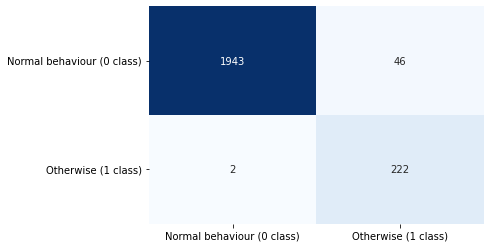

In [42]:
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

We infer that with this model over 1984 **0 class** values 46 were predicted as False Positive and over 224 **1 class** values 2 were predicted as False Negative.

In the table below some main comparative characteristics are presented:


| <center> **Comparative characteristics**  <center>   |  <center> **LogisticRegression** <center>  |  <center> **DecisionTreeClassifier**  <center> |  
| ----------- | ----------- | ----------- |
| <center> Number of used hyperparameters  <center>    | <center> 3  <center>     | <center> 2<center> | 
| <center> Running time <center>  | <center> ~ 5 sec <center>        | <center> ~ 5 sec <center> | 
| <center> Training accuracy  <center>  | <center> 0.979 <center>        | <center> 0.984 <center> | 
| <center> Testing accuracy  <center>  | <center> 0.975 <center>        | <center> 0.978 <center> | 
| <center> Type I error  <center>  | <center> 55 <center>        | <center> 46 <center> |
| <center> Type II error  <center>  | <center> 1 <center>        | <center> 2 <center> |
    
We can conclude, that overall both models perfomed very well, however the DecisionTreeClassifier perfomed slightly better.

### 5. Evaluation

The Evaluation phase is different from the Modeling technical evaluation. This phase evaluates the model concerning the business indicator and what to do next.
On the business understanding stage we've defined two main question we would like to get answers with the project:
* What features are the most important for bidding class prediction?
* Can a target variable be predicted with an accuracy higher than 90%?

We detected that three the most important features for predicting the target variable are:

* **Successive_Outbidding**;
* **Auction_Duration**;
* **Winning_Ratio**,

and the less important are:

* **Starting_Price_Average**;
* **Auction_ID**;
* **Early_Bidding**.

It means that next time when mining data we can focus more on getting observations for top 3 most important features and don't give great importance the less important features.

Also we found out that the target variable can be predicted with an accuracy higher than 90% if using the LogisticRegression and the DecisionTreeClassifier models.

### 6. Deployment

Although on practice the stage is being used as a way to deliver findings and outcomes to the user, I'll use the part to conclude what I've done.
So far, I've been able to deliver business goals, I had defined on the business understanding stage. I determined most important features which can be used in future for data mining. Both of model had perfomed really well and satisfied the accuracy requirements. I tuned hyperparameters and compared perfomance of two models. I was able to implement two dimensionality reduction techniques and compared the results.